# QRT Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import spearmanr

# configure plot font size
SMALL_SIZE = 6
MEDIUM_SIZE = 7
BIGGER_SIZE = 8
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# configure plot style
plt.style.use('seaborn-whitegrid')

In [2]:
# read the data
raw_X_train = pd.read_csv('./x_train.csv')
raw_y_train = pd.read_csv('./y_train.csv')

raw_X_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


In [3]:
raw_y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


In [4]:
# print the shape of the data
print('The shape of the X_train data is: {}'.format(raw_X_train.shape))
print('The shape of the y_train data is: {}'.format(raw_y_train.shape))

# print the number of rows containing NaN values
print('The number of rows containing NaN values in X_train is: {}'.format(raw_X_train.isnull().any(axis=1).sum()))

The shape of the X_train data is: (1494, 35)
The shape of the y_train data is: (1494, 2)
The number of rows containing NaN values in X_train is: 218


In [5]:
raw_X_test = pd.read_csv('./x_test.csv')
raw_X_test.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1115,241,FR,0.340083,-0.433604,-0.423521,0.423521,0.165333,0.519419,-0.165333,...,-0.222525,-0.513180,-0.182048,-0.982546,-0.876632,0.880491,0.692242,0.569419,-0.029697,-0.929256
1,1202,1214,FR,0.803209,0.780411,0.601610,-0.601610,0.342802,0.555367,-0.342802,...,0.857739,-0.340595,-0.301094,-0.759816,-1.221443,-0.616617,-0.737496,0.251251,0.753646,0.664086
2,1194,1047,FR,0.795540,0.721954,1.179158,-1.179158,1.620928,0.666901,-1.620928,...,0.447967,0.796475,-0.367248,0.376055,-0.483363,0.865138,0.120079,-1.485642,-0.326450,-0.349747
3,1084,1139,FR,0.172555,-0.723427,-0.044539,0.044539,NaN,-0.205276,NaN,...,-0.561295,-0.542606,-0.013291,-0.791119,-0.894309,0.239153,0.457457,-0.746863,2.262654,0.642069
4,1135,842,FR,0.949714,0.420236,0.617391,-0.617391,0.608561,-0.240856,-0.608561,...,0.503567,-0.230291,-0.609203,-0.744986,-1.196282,0.176557,0.312557,-2.219626,-0.509272,-0.488341


In [6]:
# merge the X_train and y_train data
raw_train = pd.merge(raw_X_train, raw_y_train, on='ID')
raw_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733


In [7]:
# sort data by ID and then by Date
raw_train = raw_train.sort_values(['DAY_ID'])
raw_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
742,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,...,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.108953
1211,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
1408,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
1468,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.861270
329,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905


In [8]:
# print the coloumns names
print(raw_train.columns)

# count the number of column names start with 'DE' and 'FR'
print('The number of column names start with DE is: {}'.format(raw_train.columns.str.startswith('DE').sum()))  
print('The number of column names start with FR is: {}'.format(raw_train.columns.str.startswith('FR').sum()))

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'TARGET'],
      dtype='object')
The number of column names start with DE is: 15
The number of column names start with FR is: 14


## Data Preprocessing

### Fill the NaN data with mean of the column

In [9]:
# fill the NaN values with the mean of the column
filled_train = raw_train.fillna(raw_train.mean())
filled_train.head()

# check if there are still NaN values
print('The number of rows containing NaN values in filled_train is: {}'.format(filled_train.isnull().any(axis=1).sum()))

# check duplicates in the data
print('The number of duplicates in the data is: {}'.format(filled_train.duplicated().sum()))

The number of rows containing NaN values in filled_train is: 0
The number of duplicates in the data is: 0


### Split the data by country

In [10]:
# split the data by value of the column 'COUNTRY'
raw_train_DE = filled_train[filled_train['COUNTRY']=='DE']
raw_train_FR = filled_train[filled_train['COUNTRY']=='FR']

# drop the columns which has name start with 'DE' in raw_train_FR
raw_train_FR = raw_train_FR.drop(raw_train_FR.columns[raw_train_FR.columns.str.startswith('DE')], axis=1)

# drop the columns of 'ID', 'COUNTRY' and 'DAY_ID'
raw_train_DE = raw_train_DE.drop(['ID', 'COUNTRY', 'DAY_ID'], axis=1)
# raw_train_FR.head()

# drop the columns which has name start with 'FR' in raw_train_DE
raw_train_DE = raw_train_DE.drop(raw_train_DE.columns[raw_train_DE.columns.str.startswith('FR')], axis=1)

# drop the columns of 'ID', 'COUNTRY' and 'DAY_ID'
raw_train_FR = raw_train_FR.drop(['ID', 'COUNTRY', 'DAY_ID'], axis=1)
# raw_train_DE.head()

# print the shape of the data
print('The shape of the raw_train_DE data is: {}'.format(raw_train_DE.shape))
print('The shape of the raw_train_FR data is: {}'.format(raw_train_FR.shape))

The shape of the raw_train_DE data is: (643, 19)
The shape of the raw_train_FR data is: (851, 18)


## EDA

In [11]:
# check the number of unique values in each column
print('The number of unique values in each column of raw_train_DE is: \n{}\n'.format(raw_train_DE.nunique()))
print('The number of unique values in each column of raw_train_FR is: \n{}'.format(raw_train_FR.nunique()))

The number of unique values in each column of raw_train_DE is: 
DE_CONSUMPTION      642
DE_FR_EXCHANGE      643
DE_NET_EXPORT       643
DE_NET_IMPORT       643
DE_GAS              642
DE_COAL             643
DE_HYDRO            633
DE_NUCLEAR          642
DE_SOLAR            643
DE_WINDPOW          643
DE_LIGNITE          642
DE_RESIDUAL_LOAD    642
DE_RAIN             597
DE_WIND             597
DE_TEMP             597
GAS_RET             635
COAL_RET            642
CARBON_RET          643
TARGET              641
dtype: int64

The number of unique values in each column of raw_train_FR is: 
FR_CONSUMPTION      851
FR_DE_EXCHANGE      826
FR_NET_EXPORT       781
FR_NET_IMPORT       781
FR_GAS              851
FR_COAL             810
FR_HYDRO            849
FR_NUCLEAR          851
FR_SOLAR            850
FR_WINDPOW          851
FR_RESIDUAL_LOAD    851
FR_RAIN             791
FR_WIND             805
FR_TEMP             805
GAS_RET             837
COAL_RET            849
CARBON_RET        

## 

### Plot for the German data

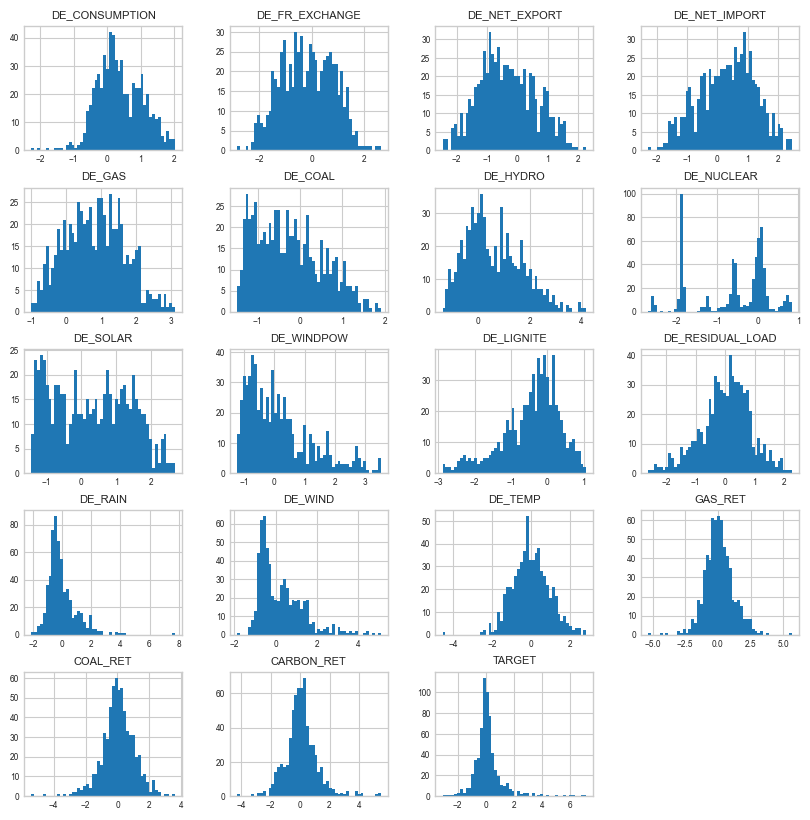

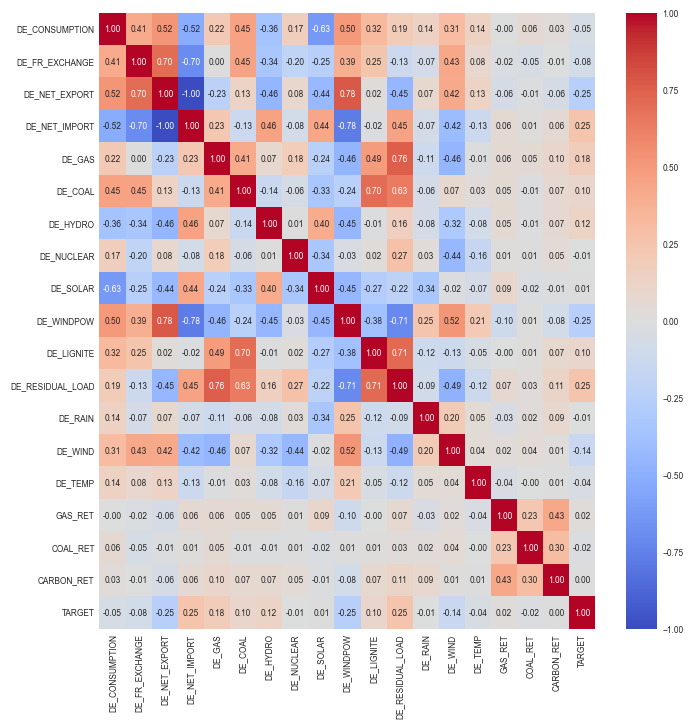

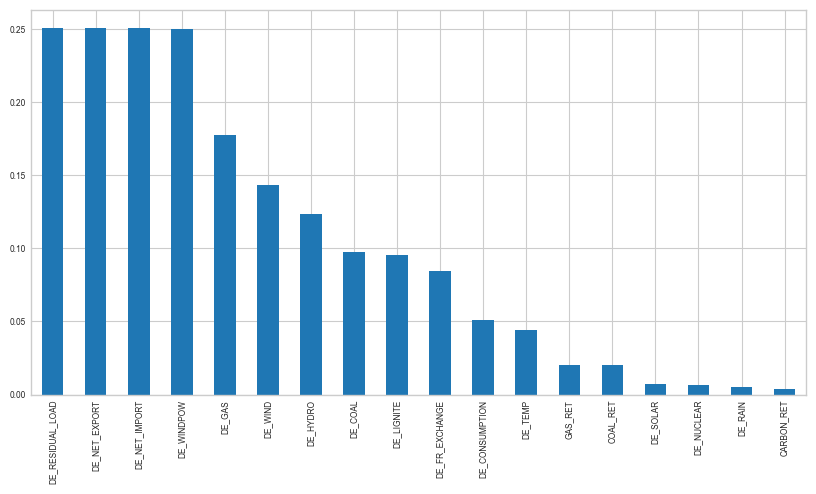

In [20]:
# solve the outliers in the data
# check the distribution of the data with smaller granularity
raw_train_DE.hist(figsize=(10,10), bins=50)
plt.show()

# check the correlation between the variables
corr = raw_train_DE.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# plot the correlation between the variables and the target variable with sorted order
corr = raw_train_DE.corr()
corr_target = abs(corr['TARGET'])
corr_target.sort_values(ascending=False, inplace=True)
corr_target.drop('TARGET', inplace=True)
corr_target.plot.bar(figsize=(10,5))
plt.show()




### Plot of the France Data

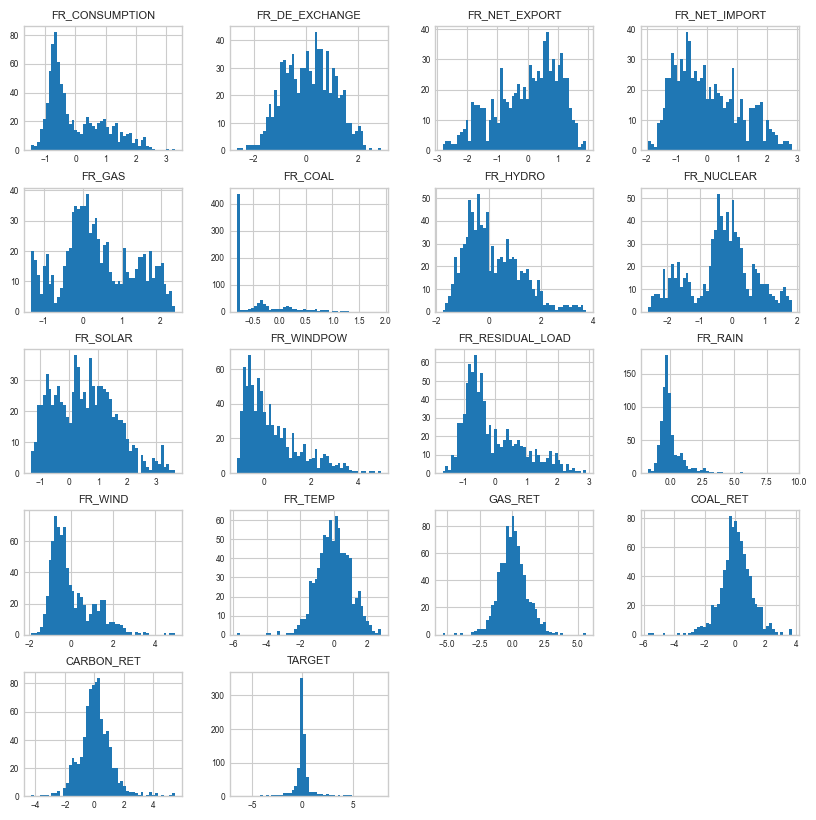

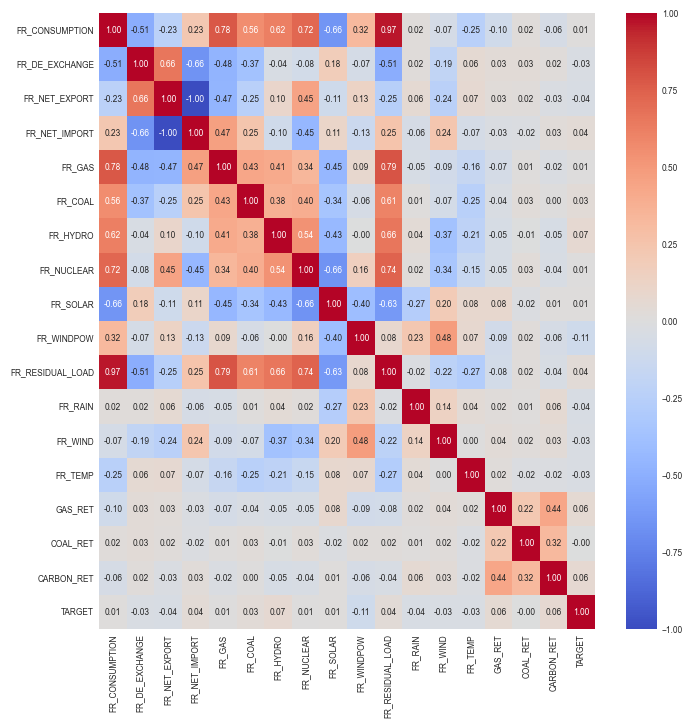

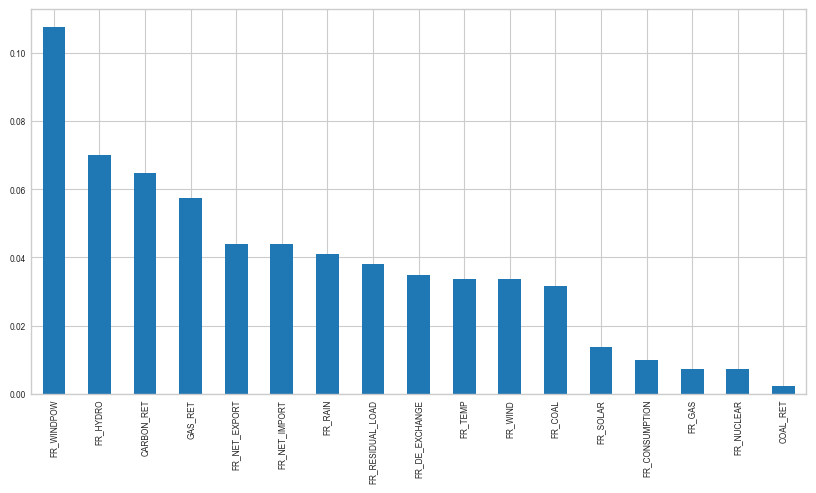

In [21]:
# solve the outliers in the data
# check the distribution of the data with smaller granularity
raw_train_FR.hist(figsize=(10,10), bins=50)
plt.show()

# check the correlation between the variables
corr = raw_train_FR.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# plot the correlation between the variables and the target variable with sorted order
corr = raw_train_FR.corr()
corr_target = abs(corr['TARGET'])
corr_target.sort_values(ascending=False, inplace=True)
corr_target.drop('TARGET', inplace=True)
corr_target.plot.bar(figsize=(10,5))
plt.show()


## Split the data to training set and validation set

In [12]:
# split the data into train and validation sets
from sklearn.model_selection import train_test_split

train_FR, val_FR = train_test_split(raw_train_FR, test_size=0.2, random_state=42)

train_DE, val_DE = train_test_split(raw_train_DE, test_size=0.2, random_state=42)

# print the shape of the train and validation sets
print('The shape of the train_FR data is: {}'.format(train_FR.shape))
print('The shape of the val_FR data is: {}'.format(val_FR.shape))

print('The shape of the train_DE data is: {}'.format(train_DE.shape))
print('The shape of the val_DE data is: {}'.format(val_DE.shape))

The shape of the train_FR data is: (680, 18)
The shape of the val_FR data is: (171, 18)
The shape of the train_DE data is: (514, 19)
The shape of the val_DE data is: (129, 19)


In [44]:
train_FR

,FR_CONSUMPTION,FR_DE_EXCHANGE,FR_NET_EXPORT,FR_NET_IMPORT,FR_GAS,FR_COAL,FR_HYDRO,FR_NUCLEAR,FR_SOLAR,FR_WINDPOW,FR_RESIDUAL_LOAD,FR_RAIN,FR_WIND,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
422,0.350075,-0.958594,0.694387,-0.694387,0.062686,-0.789830,-0.937701,0.781129,0.922535,1.268527,0.012315,-0.553300,-0.131543,-0.852357,-0.612858,0.406340,-0.870511,-0.953039
842,-0.615261,-0.134464,-1.449254,1.449254,0.314373,-0.771119,-0.767435,-1.884891,3.507539,-0.042154,-0.832138,-0.378781,1.015388,0.733903,0.287418,0.681848,-0.948123,-0.319575
1341,-0.218111,1.224154,0.947850,-0.947850,-1.168258,-0.781232,-0.445258,0.284459,0.123158,1.185180,-0.482298,-0.309827,-0.224969,-0.419321,0.175473,-0.139109,0.745399,0.386031
1201,-0.569562,0.524902,1.069542,-1.069542,-0.438588,0.113025,-0.629557,0.066482,1.649309,0.317604,-0.736361,-0.380301,1.606559,1.391960,0.207142,-0.210235,0.534322,1.704840
471,-0.234745,0.870278,-0.072643,0.072643,-0.963118,-0.375583,1.064346,0.319523,0.254204,-0.034719,-0.238614,0.157236,-0.551181,0.530652,0.000000,-0.852656,0.194699,0.041126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0.993851,-0.014411,-0.636112,0.636112,1.404785,0.006362,2.105027,0.112294,0.218848,-0.492967,1.024856,0.019357,0.123099,0.008404,0.929566,1.628401,0.964213,-1.904983
102,1.154025,-1.126164,-0.701102,0.701102,1.932507,0.427516,-0.153915,0.368597,0.895051,-0.329895,1.131356,-0.502713,-0.487588,0.763417,-0.013867,-1.855446,-0.463678,-0.054894
623,-0.801658,2.100758,1.291329,-1.291329,-0.346498,-0.779129,-0.829205,-0.439569,0.824452,1.226737,-1.111619,-0.074312,-0.126597,0.039830,-0.325451,-0.779328,0.212299,-0.143492
885,-0.933237,-0.466472,-1.604590,1.604590,0.085565,-0.770489,-0.916896,-2.261831,2.662236,0.460208,-1.198761,0.941683,1.734309,0.403638,-1.982173,0.247533,-0.252126,-0.285126


## Train
### Classification: For France Dataset

In [14]:
# For 'TARGET' in train_FR, change all positive values to 1 and negative values to -1 stored in 'train_FR_cl'
train_FR_cl = train_FR.copy()
train_FR_cl['TARGET'] = np.where(train_FR_cl['TARGET'] > 0, 1, -1)

# For 'TARGET' in val_FR, change all positive values to 1 and negative values to -1 stored in 'val_FR_cl'
val_FR_cl = val_FR.copy()
val_FR_cl['TARGET'] = np.where(val_FR_cl['TARGET'] > 0, 1, -1)

In [26]:
X_train_FR_cl = train_FR_cl.drop('TARGET', axis=1)
y_train_FR_cl = train_FR_cl['TARGET']

X_val_FR_cl = val_FR_cl.drop('TARGET', axis=1)
y_val_FR_cl = val_FR_cl['TARGET']

# Build Random Forest model
from sklearn.ensemble import RandomForestClassifier

best_score = 0
best_n = 0
for i in range(50, 171, 3):

    rf_model_FR = RandomForestClassifier(n_estimators=i, random_state=42)  # hyperparameters are tuned manually

    rf_model_FR.fit(X_train_FR_cl, y_train_FR_cl)

    preds_FR_cl = rf_model_FR.predict(X_val_FR_cl)

    # evaluate the model using the Spearman correlation coefficient
    score = spearmanr(preds_FR_cl, y_val_FR_cl).correlation * 100
    print("Score on validation for {} estimators : {}".format(i, score))
    if score > best_score:
        best_score = score
        best_n = i

    # evaluate based on the training set
    train_preds_cl = rf_model_FR.predict(X_train_FR_cl)
    train_score = spearmanr(train_preds_cl, y_train_FR_cl).correlation * 100
    print("Score on train for {} estimators : {}".format(i, train_score))

print("Best score on validation is {} for {} estimators".format(best_score, best_n))



Score on validation for 50 estimators : 19.08401338457116
Score on train for 50 estimators : 100.0
Score on validation for 53 estimators : 22.638109654563852
Score on train for 53 estimators : 100.0
Score on validation for 56 estimators : 17.912760554700462
Score on train for 56 estimators : 100.0
Score on validation for 59 estimators : 19.258144712821114
Score on train for 59 estimators : 100.0
Score on validation for 62 estimators : 16.74497848582345
Score on train for 62 estimators : 100.0
Score on validation for 65 estimators : 16.81296845976107
Score on train for 65 estimators : 100.0
Score on validation for 68 estimators : 19.09974108539237
Score on train for 68 estimators : 100.0
Score on validation for 71 estimators : 25.006938788866705
Score on train for 71 estimators : 100.0
Score on validation for 74 estimators : 19.09974108539237
Score on train for 74 estimators : 100.0
Score on validation for 77 estimators : 16.74497848582345
Score on train for 77 estimators : 100.0
Score 

In [27]:
# Best RF model for classification
best_rf_FR = RandomForestClassifier(n_estimators=best_n, random_state=42)
best_rf_FR.fit(X_train_FR_cl, y_train_FR_cl)

RandomForestClassifier(n_estimators=134, random_state=42)

### Regression: For France Data

In [75]:
# For 'TARGET' in train_FR, change all values to absolute values stored in 'train_FR_rg'
train_FR_rg = train_FR.copy()
train_FR_rg['TARGET'] = abs(train_FR_rg['TARGET'])

# For 'TARGET' in val_FR, change all values to absolute values stored in 'train_FR_rg'
val_FR_rg = val_FR.copy()
val_FR_rg['TARGET'] = abs(val_FR_rg['TARGET'])

Epoch: 1 	Training Loss: 1.067379 	Validation Loss: 0.680979
Epoch: 2 	Training Loss: 0.945666 	Validation Loss: 0.603151
Epoch: 3 	Training Loss: 0.901810 	Validation Loss: 0.586547
Epoch: 4 	Training Loss: 0.880665 	Validation Loss: 0.580642
Epoch: 5 	Training Loss: 0.879623 	Validation Loss: 0.579430
Epoch: 6 	Training Loss: 0.877378 	Validation Loss: 0.573461
Epoch: 7 	Training Loss: 0.876160 	Validation Loss: 0.572525
Epoch: 8 	Training Loss: 0.877397 	Validation Loss: 0.576073
Epoch: 9 	Training Loss: 0.875070 	Validation Loss: 0.575094
Epoch: 10 	Training Loss: 0.875453 	Validation Loss: 0.574941
Epoch: 11 	Training Loss: 0.874404 	Validation Loss: 0.574361
Epoch: 12 	Training Loss: 0.872956 	Validation Loss: 0.575123
Epoch: 13 	Training Loss: 0.873305 	Validation Loss: 0.570218
Epoch: 14 	Training Loss: 0.872283 	Validation Loss: 0.572625
Epoch: 15 	Training Loss: 0.872233 	Validation Loss: 0.574624
Epoch: 16 	Training Loss: 0.871946 	Validation Loss: 0.571799
Epoch: 17 	Traini

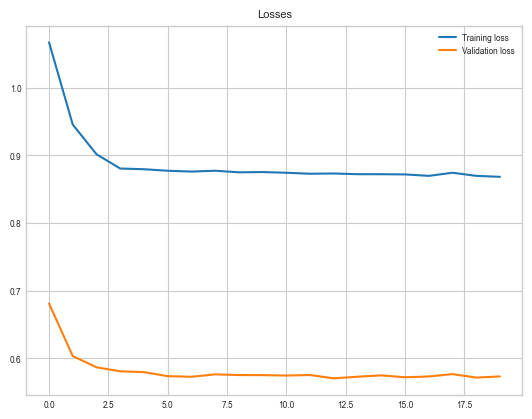

Loss on validation set: 0.573342


In [76]:
X_train_FR_rg = train_FR_rg.drop('TARGET', axis=1)
y_train_FR_rg = train_FR_rg['TARGET']

X_val_FR_rg = val_FR_rg.drop('TARGET', axis=1)
y_val_FR_rg = val_FR_rg['TARGET']

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# define the model
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)

        return x
    
# define the training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=20):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        # train the model
        model.train()
        train_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)

        # validate the model
        model.eval()
        val_loss = 0.0
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item() * data.size(0)

        # calculate the average losses
        train_loss = train_loss / len(train_loader.sampler)
        val_loss = val_loss / len(val_loader.sampler)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # print the losses
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch + 1, train_loss, val_loss))

    return train_losses, val_losses

# define the training and validation sets
train_X = torch.tensor(X_train_FR_rg.values, dtype=torch.float32)
train_y = torch.tensor(y_train_FR_rg.values, dtype=torch.float32)
val_X = torch.tensor(X_val_FR_rg.values, dtype=torch.float32)
val_y = torch.tensor(y_val_FR_rg.values, dtype=torch.float32)

# define the training and validation data loaders
train_data = TensorDataset(train_X, train_y)
val_data = TensorDataset(val_X, val_y)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=True)

# define the model
model = Net(train_X.shape[1])

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# train the model
train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=20)

# plot the losses
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title('Losses')
plt.show()

# make predictions
preds = model(val_X)
preds = preds.detach().numpy()

# loss on validation set
val_loss = criterion(torch.tensor(preds), val_y).item()
print('Loss on validation set: {:.6f}'.format(val_loss))

In [80]:
# MSE on validation set
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val_FR_rg, preds)
print('MSE on validation set is: {}'.format(mse))

print(preds[:10])
print(val_data[:10][0][0])

MSE on validation set is: 0.5614841908376965
[[0.5998304 ]
 [0.5823172 ]
 [0.68973655]
 [0.78516775]
 [0.4087347 ]
 [0.33757132]
 [0.5159265 ]
 [0.47138602]
 [0.54637635]
 [0.4233667 ]]
tensor([-0.6207,  1.3494,  1.0963, -1.0963, -0.4459, -0.7788, -0.6960, -0.0938,
         1.3379, -0.2838, -0.6343, -1.2731, -0.6188, -1.1988,  0.5087, -0.3779,
        -1.4909])


### Combine the result for the france data

In [81]:
y_pred_cl = best_rf_FR.predict(X_val_FR_cl)
y_pred_rg = preds.reshape(-1)

print(y_pred_cl[:10])
print(y_pred_rg[:10])
print(val_FR['TARGET'][:10])

# evaluate the model using the Spearman correlation coefficient
score = spearmanr(y_pred_rg, val_FR['TARGET']).correlation * 100
print("Score on validation: {}".format(score))

score = spearmanr(y_pred_cl, val_FR['TARGET']).correlation * 100
print("Score on validation: {}".format(score))

# when the sign of the y_pred_rg is different from the sign of y_pred_cl, change the sign of y_pred_rg to the sign of y_pred_cl
for i in range(len(y_pred_cl)):
    if y_pred_cl[i] == 1 and y_pred_rg[i] < 0:
        y_pred_rg[i] = -y_pred_rg[i]
    elif y_pred_cl[i] == -1 and y_pred_rg[i] > 0:
        y_pred_rg[i] = -y_pred_rg[i]

print(y_pred_rg[:10])
# evaluate the model using the Spearman correlation coefficient
score = spearmanr(y_pred_rg, val_FR['TARGET']).correlation * 100
print("Score on validation: {}".format(score))


[-1  1  1 -1 -1  1  1  1 -1 -1]
[0.5998304  0.5823172  0.68973655 0.78516775 0.4087347  0.33757132
 0.5159265  0.47138602 0.54637635 0.4233667 ]
641     0.038481
1331    0.517190
961     0.097205
1492   -0.640917
543     0.270906
617    -0.052468
1031    1.463850
236     0.044804
1417   -0.249386
209    -0.025963
Name: TARGET, dtype: float64
Score on validation: 1.915184678522572
Score on validation: 23.383210392566216
[-0.5998304   0.5823172   0.68973655 -0.78516775 -0.4087347   0.33757132
  0.5159265   0.47138602 -0.54637635 -0.4233667 ]
Score on validation: 19.662082703338378


## Build Models for Classification

## Build Models for Regression

In [18]:
# Build a linear regression model
from sklearn.linear_model import LinearRegression

# define the model
model = LinearRegression()

# fit the model
model.fit(train.drop(['TARGET'], axis=1), train['TARGET'])

# make predictions
preds = model.predict(val.drop(['TARGET'], axis=1))

# evaluate the model using the Spearman correlation coefficient
print('The Spearman correlation coefficient is: {}'.format(100 * spearmanr(preds, val['TARGET']).correlation))

# evaluate based on the training set
train_preds = model.predict(train.drop(['TARGET'], axis=1))
print('The Spearman correlation coefficient for the training set is: {}'.format(100 * spearmanr(train_preds, train['TARGET']).correlation))


The Spearman correlation coefficient is: 19.981022425071984
The Spearman correlation coefficient for the training set is: 30.67674330853555


In [ ]:
# Build a random forest model
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor(n_estimators=30, random_state=42)

# fit the model
model.fit(train.drop(['TARGET'], axis=1), train['TARGET'])

# make predictions
preds = model.predict(val.drop(['TARGET'], axis=1))

# evaluate the model using the Spearman correlation coefficient
print('The Spearman correlation coefficient is: {}'.format(100 * spearmanr(preds, val['TARGET']).correlation))

# evaluate based on the training set
train_preds = model.predict(train.drop(['TARGET'], axis=1))
print('The Spearman correlation coefficient for the training set is: {}'.format(100 * spearmanr(train_preds, train['TARGET']).correlation))

The Spearman correlation coefficient is: 9.36727951048995
The Spearman correlation coefficient for the training set is: 85.51824812644661


In [20]:
# build a KNN model
from sklearn.neighbors import KNeighborsRegressor

# define the model
model = KNeighborsRegressor(n_neighbors=5)

# fit the model
model.fit(train.drop(['TARGET'], axis=1), train['TARGET'])

# make predictions
preds = model.predict(val.drop(['TARGET'], axis=1))

# evaluate the model using the Spearman correlation coefficient
print('The Spearman correlation coefficient is: {}'.format(100 * spearmanr(preds, val['TARGET']).correlation))

# evaluate based on the training set
train_preds = model.predict(train.drop(['TARGET'], axis=1))

: 

Epoch: 1 	Training Loss: 36.040791 	Validation Loss: 27.166764
Epoch: 2 	Training Loss: 9.641984 	Validation Loss: 5.324839
Epoch: 3 	Training Loss: 3.797890 	Validation Loss: 1.293889
Epoch: 4 	Training Loss: 2.066572 	Validation Loss: 1.882922
Epoch: 5 	Training Loss: 1.565866 	Validation Loss: 1.128114
Epoch: 6 	Training Loss: 1.267699 	Validation Loss: 1.172442
Epoch: 7 	Training Loss: 1.262213 	Validation Loss: 1.090932
Epoch: 8 	Training Loss: 1.224758 	Validation Loss: 1.062697
Epoch: 9 	Training Loss: 1.201249 	Validation Loss: 1.332954
Epoch: 10 	Training Loss: 1.311231 	Validation Loss: 1.071821


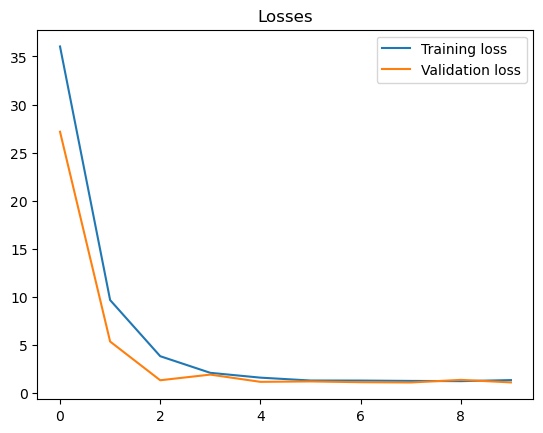

The Spearman correlation coefficient is: 3.1492128364155025
The Spearman correlation coefficient for the training set is: -3.058906354202893


In [ ]:
# Build a neural network model based on the Spearman correlation coefficient using torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# define the model
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x
    
# define the training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=5):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        # train the model
        model.train()
        train_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)

        # validate the model
        model.eval()
        val_loss = 0.0
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item() * data.size(0)

        # calculate the average losses
        train_loss = train_loss / len(train_loader.sampler)
        val_loss = val_loss / len(val_loader.sampler)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # print the losses
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch + 1, train_loss, val_loss))

    return train_losses, val_losses

# define the training and validation sets
train_X = torch.tensor(train.drop(['TARGET'], axis=1).values, dtype=torch.float32)
train_y = torch.tensor(train['TARGET'].values, dtype=torch.float32)
val_X = torch.tensor(val.drop(['TARGET'], axis=1).values, dtype=torch.float32)
val_y = torch.tensor(val['TARGET'].values, dtype=torch.float32)

# define the training and validation data loaders
train_data = TensorDataset(train_X, train_y)
val_data = TensorDataset(val_X, val_y)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=True)

# define the model
model = Net(train_X.shape[1])

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# train the model
train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)

# plot the losses
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title('Losses')
plt.show()

# make predictions
preds = model(val_X)
preds = preds.detach().numpy()

# evaluate the model using the Spearman correlation coefficient
print('The Spearman correlation coefficient is: {}'.format(100 * spearmanr(preds, val_y).correlation))

# evaluate based on the training set
train_preds = model(train_X)
train_preds = train_preds.detach().numpy()
print('The Spearman correlation coefficient for the training set is: {}'.format(100 * spearmanr(train_preds, train_y).correlation))

In [ ]:
# calculate the MSE between the predictions and the target variable
from sklearn.metrics import mean_squared_error

print('The MSE between the predictions and the target variable is: {}'.format(mean_squared_error(preds, val_y)))

# MSE between the predictions and the target variable for the training set
print('The MSE between the predictions and the target variable is: {}'.format(mean_squared_error(train_preds, train_y)))


The MSE between the predictions and the target variable is: 1.0506037473678589
The MSE between the predictions and the target variable is: 1.2141435146331787


In [ ]:
# generate an array with length 10
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
arr2 = np.arange(10, 20)
arr2[2] = 11.5
arr2

array([10, 11, 11, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
# calculate the Spearman correlation coefficient
spearmanr(arr, arr2).correlation

0.996965091635306